In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Analyze models by different random state

In [55]:
split_genre_all_model_df = pd.read_csv('split_genre_all_model.csv')

In [56]:
genr_cluster_pca_like_all_model_df = pd.read_csv('genr_cluster_pca_like_all_model.csv')

In [57]:
model_metric_reg_df = pd.concat([split_genre_all_model_df, genr_cluster_pca_like_all_model_df])

In [58]:
model_metric_reg_df

,DataFrame,Model,rmse_mean,rmse_std,mape_mean,mape_std,score_time_mean,score_time_std
0,Split_genres,XGBoost,42.841299,0.213822,0.240069,0.001493,0.016586,0.003027
1,Split_genres,LightGBM,42.543875,0.234436,0.234899,0.001762,0.004433,0.000143
2,Split_genres,Gradient_Boosting,43.691336,0.285543,0.246845,0.002576,0.003806,0.000473
3,Split_genres,Polynomial_regression,47.920388,0.364998,0.265955,0.002287,0.007479,0.000542
0,Genr_cluster_pca_like,XGBoost,43.498525,0.207383,0.243918,0.001699,0.012026,0.000760
1,Genr_cluster_pca_like,LightGBM,42.853276,0.219543,0.239187,0.001686,0.004040,0.000074
2,Genr_cluster_pca_like,Gradient_Boosting,44.143442,0.309011,0.249339,0.002463,0.003594,0.001104
3,Genr_cluster_pca_like,Polynomial_regression,49.386672,0.437922,0.270825,0.002718,0.007624,0.000542


In [59]:
model_metric_reg_df.index = np.arange(model_metric_reg_df.shape[0])

In [60]:
model_metric_reg_df

,DataFrame,Model,rmse_mean,rmse_std,mape_mean,mape_std,score_time_mean,score_time_std
0,Split_genres,XGBoost,42.841299,0.213822,0.240069,0.001493,0.016586,0.003027
1,Split_genres,LightGBM,42.543875,0.234436,0.234899,0.001762,0.004433,0.000143
2,Split_genres,Gradient_Boosting,43.691336,0.285543,0.246845,0.002576,0.003806,0.000473
3,Split_genres,Polynomial_regression,47.920388,0.364998,0.265955,0.002287,0.007479,0.000542
4,Genr_cluster_pca_like,XGBoost,43.498525,0.207383,0.243918,0.001699,0.012026,0.000760
5,Genr_cluster_pca_like,LightGBM,42.853276,0.219543,0.239187,0.001686,0.004040,0.000074
6,Genr_cluster_pca_like,Gradient_Boosting,44.143442,0.309011,0.249339,0.002463,0.003594,0.001104
7,Genr_cluster_pca_like,Polynomial_regression,49.386672,0.437922,0.270825,0.002718,0.007624,0.000542


In [61]:
model_metric_reg_df['model_in_df'] = model_metric_reg_df['DataFrame']+ '_'+ model_metric_reg_df['Model']

In [62]:
model_metric_reg_df.drop(columns=['DataFrame', 'Model'], inplace = True)

In [63]:
inside_col = model_metric_reg_df.pop('model_in_df')

In [64]:
model_metric_reg_df.insert(0, 'model_in_df', inside_col)

In [65]:
model_metric_reg_df

,model_in_df,rmse_mean,rmse_std,mape_mean,mape_std,score_time_mean,score_time_std
0,Split_genres_XGBoost,42.841299,0.213822,0.240069,0.001493,0.016586,0.003027
1,Split_genres_LightGBM,42.543875,0.234436,0.234899,0.001762,0.004433,0.000143
2,Split_genres_Gradient_Boosting,43.691336,0.285543,0.246845,0.002576,0.003806,0.000473
3,Split_genres_Polynomial_regression,47.920388,0.364998,0.265955,0.002287,0.007479,0.000542
4,Genr_cluster_pca_like_XGBoost,43.498525,0.207383,0.243918,0.001699,0.012026,0.000760
5,Genr_cluster_pca_like_LightGBM,42.853276,0.219543,0.239187,0.001686,0.004040,0.000074
6,Genr_cluster_pca_like_Gradient_Boosting,44.143442,0.309011,0.249339,0.002463,0.003594,0.001104
7,Genr_cluster_pca_like_Polynomial_regression,49.386672,0.437922,0.270825,0.002718,0.007624,0.000542


## F-test for testing the hypothesis of equality of variances

In [67]:
sample_size_stability = 100 

In [68]:
def fill_equality_var(lst_std, dfn, dfd):
    sign_diff_var = []
    for n_index in range(len(lst_std)):
        var_n = lst_std[n_index] ** 2
        for d_index in range(n_index+1, len(lst_std)):
            var_d = lst_std[d_index] ** 2
            F_stat = var_n/var_d
            p_value = 1 - stats.f.cdf(F_stat, dfn, dfd)
            p_value = 2 * min(p_value, 1 - p_value) #two-sidedness of the test
            if p_value < 0.05:
                sign_diff_var.append(1)
            else:
                sign_diff_var.append(0)
    return sign_diff_var

In [69]:
dfn = sample_size_stability - 1
dfd = sample_size_stability - 1

In [70]:
dfd

99

In [71]:
fill_equality_var(list(model_metric_reg_df['rmse_std']), dfn, dfd)

[0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1]

In [72]:
fill_equality_var(list(model_metric_reg_df['mape_std']), dfn, dfd)

[0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0]

In [73]:
fill_equality_var(list(model_metric_reg_df['score_time_std']), dfn, dfd)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1]

In [74]:
#### Conclusion: The difference in variances is significant => Welch's t-test

## Welch's t-test

In [76]:
def welchs_test(metric_mean, metric_std, df_metric_models, sample_size_stability):
    df = pd.DataFrame(index = df_metric_models['model_in_df'].to_list(), columns = df_metric_models['model_in_df'].to_list())
    for row_ind_model in range(df_metric_models.shape[0]):
        for col_ind_model in range(row_ind_model + 1, df_metric_models.shape[0]):
            p_val = stats.ttest_ind_from_stats(mean1 = df_metric_models.loc[row_ind_model,metric_mean], 
                                           std1 = df_metric_models.loc[row_ind_model, metric_std], 
                                           nobs1 = sample_size_stability, 
                                           mean2 = df_metric_models.loc[col_ind_model,metric_mean], 
                                           std2 = df_metric_models.loc[col_ind_model, metric_std], 
                                           nobs2 = sample_size_stability, 
                                           equal_var=False).pvalue
            if p_val < 0.05:
                df.loc[df_metric_models.loc[row_ind_model, 'model_in_df'], df_metric_models.loc[col_ind_model, 'model_in_df']] = 1
            else:
                df.loc[df_metric_models.loc[row_ind_model, 'model_in_df'], df_metric_models.loc[col_ind_model, 'model_in_df']] = 0
    return df

### RMSE

In [78]:
rmse_welchs_test_df = welchs_test('rmse_mean', 'rmse_std', model_metric_reg_df, sample_size_stability)

In [101]:
rmse_welchs_test_df

,Split_genres_XGBoost,Split_genres_LightGBM,Split_genres_Gradient_Boosting,Split_genres_Polynomial_regression,Genr_cluster_pca_like_XGBoost,Genr_cluster_pca_like_LightGBM,Genr_cluster_pca_like_Gradient_Boosting,Genr_cluster_pca_like_Polynomial_regression
Split_genres_XGBoost,NaN,1,1,1,1,0,1,1
Split_genres_LightGBM,NaN,NaN,1,1,1,1,1,1
Split_genres_Gradient_Boosting,NaN,NaN,NaN,1,1,1,1,1
Split_genres_Polynomial_regression,NaN,NaN,NaN,NaN,1,1,1,1
Genr_cluster_pca_like_XGBoost,NaN,NaN,NaN,NaN,NaN,1,1,1
Genr_cluster_pca_like_LightGBM,NaN,NaN,NaN,NaN,NaN,NaN,1,1
Genr_cluster_pca_like_Gradient_Boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Genr_cluster_pca_like_Polynomial_regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
model_metric_reg_df.loc[model_metric_reg_df['rmse_mean'] == model_metric_reg_df['rmse_mean'].min(), 'model_in_df']

1    Split_genres_LightGBM
Name: model_in_df, dtype: object

### MAPE

In [137]:
mape_welchs_test_df = welchs_test('mape_mean', 'mape_std', model_metric_reg_df, sample_size_stability)

In [138]:
mape_welchs_test_df

,Split_genres_XGBoost,Split_genres_LightGBM,Split_genres_Gradient_Boosting,Split_genres_Polynomial_regression,Genr_cluster_pca_like_XGBoost,Genr_cluster_pca_like_LightGBM,Genr_cluster_pca_like_Gradient_Boosting,Genr_cluster_pca_like_Polynomial_regression
Split_genres_XGBoost,NaN,1,1,1,1,1,1,1
Split_genres_LightGBM,NaN,NaN,1,1,1,1,1,1
Split_genres_Gradient_Boosting,NaN,NaN,NaN,1,1,1,1,1
Split_genres_Polynomial_regression,NaN,NaN,NaN,NaN,1,1,1,1
Genr_cluster_pca_like_XGBoost,NaN,NaN,NaN,NaN,NaN,1,1,1
Genr_cluster_pca_like_LightGBM,NaN,NaN,NaN,NaN,NaN,NaN,1,1
Genr_cluster_pca_like_Gradient_Boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Genr_cluster_pca_like_Polynomial_regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
model_metric_reg_df.loc[model_metric_reg_df['mape_mean'] == model_metric_reg_df['mape_mean'].min(), 'model_in_df']

1    Split_genres_LightGBM
Name: model_in_df, dtype: object

### Score time

In [141]:
score_time_welchs_test_df = welchs_test('score_time_mean', 'score_time_std', model_metric_reg_df, sample_size_stability)

In [142]:
score_time_welchs_test_df

,Split_genres_XGBoost,Split_genres_LightGBM,Split_genres_Gradient_Boosting,Split_genres_Polynomial_regression,Genr_cluster_pca_like_XGBoost,Genr_cluster_pca_like_LightGBM,Genr_cluster_pca_like_Gradient_Boosting,Genr_cluster_pca_like_Polynomial_regression
Split_genres_XGBoost,NaN,1,1,1,1,1,1,1
Split_genres_LightGBM,NaN,NaN,1,1,1,1,1,1
Split_genres_Gradient_Boosting,NaN,NaN,NaN,1,1,1,0,1
Split_genres_Polynomial_regression,NaN,NaN,NaN,NaN,1,1,1,0
Genr_cluster_pca_like_XGBoost,NaN,NaN,NaN,NaN,NaN,1,1,1
Genr_cluster_pca_like_LightGBM,NaN,NaN,NaN,NaN,NaN,NaN,1,1
Genr_cluster_pca_like_Gradient_Boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Genr_cluster_pca_like_Polynomial_regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
model_metric_reg_df.loc[model_metric_reg_df['score_time_mean'] == model_metric_reg_df['score_time_mean'].min(), 'model_in_df']

6    Genr_cluster_pca_like_Gradient_Boosting
Name: model_in_df, dtype: object

In [144]:
### The best result by score_time is given by Genr_cluster_pca_like_Gradient_Boosting and Split_genres_Gradient_Boosting (because of test)

# Analyze models by distribution of absolute errors

## Export daatsets

In [147]:
distr_abs_err_xgb_split_genre = pd.read_csv('distr_abs_err_xgb_split_genre.csv')

In [148]:
distr_abs_err_xgb_split_genre.drop('Unnamed: 0', axis = 1, inplace = True)

In [149]:
distr_abs_err_xgb_split_genre

,index,xgboost_split_genre
0,1076,27.111040
1,358,228.203871
2,2408,61.174955
3,4074,24.696714
4,2998,14.299505
...,...,...
789,3247,35.833986
790,1175,1.142378
791,588,66.209507
792,3145,67.951057


In [150]:
distr_abs_err_xgb_genr_cluster_pca_like = pd.read_csv('distr_abs_err_xgb_genr_cluster_pca_like.csv')

In [151]:
distr_abs_err_xgb_genr_cluster_pca_like.drop('Unnamed: 0', axis = 1, inplace = True)

In [152]:
distr_abs_err_xgb_genr_cluster_pca_like

,index,xgboost_genr_cluster_pca_like
0,1076,29.269166
1,358,216.081831
2,2408,63.478696
3,4074,29.774198
4,2998,8.715769
...,...,...
789,3247,22.298296
790,1175,28.068163
791,588,62.887943
792,3145,71.147575


In [153]:
distr_abs_err_pol_reg_split_genre = pd.read_csv('distr_abs_err_pol_reg_split_genre.csv')

In [154]:
distr_abs_err_pol_reg_split_genre.drop('Unnamed: 0', axis = 1, inplace = True)

In [155]:
distr_abs_err_pol_reg_split_genre

,index,pol_reg_split_genre
0,1076,36.659984
1,358,231.701436
2,2408,61.992676
3,4074,48.041729
4,2998,25.768744
...,...,...
789,3247,40.848643
790,1175,8.537494
791,588,19.064982
792,3145,37.092708


In [156]:
distr_abs_err_pol_reg_genr_cluster_pca_like = pd.read_csv('distr_abs_err_pol_reg_genr_cluster_pca_like.csv')

In [157]:
distr_abs_err_pol_reg_genr_cluster_pca_like.drop('Unnamed: 0', axis = 1, inplace = True)

In [158]:
distr_abs_err_pol_reg_genr_cluster_pca_like

,index,pol_reg_genr_cluster_pca_like,y_valid
0,1076,35.804484,149.063460
1,358,195.518211,41.968859
2,2408,76.288322,268.270337
3,4074,60.170238,82.683840
4,2998,4.340422,164.069133
...,...,...,...
789,3247,38.850536,134.777887
790,1175,1.711350,264.889726
791,588,49.901858,193.310665
792,3145,42.780320,215.748207


In [159]:
distr_abs_err_lgbmr_split_genre = pd.read_csv('distr_abs_err_lgbmr_split_genre.csv')

In [160]:
distr_abs_err_lgbmr_split_genre.drop('Unnamed: 0', axis = 1, inplace = True)

In [161]:
distr_abs_err_lgbmr_split_genre

,index,lightgbm_split_genre
0,1076,26.379399
1,358,225.062813
2,2408,68.882001
3,4074,29.645184
4,2998,7.293567
...,...,...
789,3247,31.806375
790,1175,4.456781
791,588,69.814620
792,3145,44.161282


In [162]:
distr_abs_err_lgbm_genr_cluster_pca_like = pd.read_csv('distr_abs_err_lgbm_genr_cluster_pca_like.csv')

In [163]:
distr_abs_err_lgbm_genr_cluster_pca_like.drop('Unnamed: 0', axis = 1, inplace = True)

In [164]:
distr_abs_err_lgbm_genr_cluster_pca_like

,index,lightgbm_genr_cluster_pca_like
0,1076,13.580030
1,358,227.818483
2,2408,33.195337
3,4074,19.152611
4,2998,6.726151
...,...,...
789,3247,35.730286
790,1175,8.094714
791,588,70.576332
792,3145,53.691203


In [165]:
distr_abs_err_grad_boost_split_genre = pd.read_csv('distr_abs_err_grad_boost_split_genre.csv')

In [166]:
distr_abs_err_grad_boost_split_genre.drop('Unnamed: 0', axis = 1, inplace = True)

In [167]:
distr_abs_err_grad_boost_split_genre

,index,grad_boost_split_genre
0,1076,20.111866
1,358,220.917901
2,2408,46.561171
3,4074,21.113821
4,2998,16.555391
...,...,...
789,3247,22.395257
790,1175,0.944078
791,588,72.785111
792,3145,86.829504


In [168]:
distr_abs_err_grad_boost_genr_cluster_pca_like = pd.read_csv('distr_abs_err_grad_boost_genr_cluster_pca_like.csv')

In [169]:
distr_abs_err_grad_boost_genr_cluster_pca_like.drop('Unnamed: 0', axis = 1, inplace = True)

In [170]:
distr_abs_err_grad_boost_genr_cluster_pca_like

,index,grad_boost_genr_cluster_pca_like
0,1076,34.631668
1,358,210.312734
2,2408,50.824058
3,4074,33.854661
4,2998,12.490557
...,...,...
789,3247,19.023922
790,1175,12.223590
791,588,69.147870
792,3145,58.541127


## Join datasets with absolute errors

In [172]:
models_absol_err_df = pd.merge(
    distr_abs_err_xgb_split_genre,
    distr_abs_err_lgbmr_split_genre,
    on='index'
)

In [173]:
models_absol_err_df = pd.merge(
    models_absol_err_df,
    distr_abs_err_grad_boost_split_genre,
    on='index'  
)

In [174]:
models_absol_err_df = pd.merge(
    models_absol_err_df,
    distr_abs_err_pol_reg_split_genre,
    on='index'  
)

In [175]:
models_absol_err_df = pd.merge(
    models_absol_err_df,
    distr_abs_err_xgb_genr_cluster_pca_like,
    on='index'  
)

In [176]:
models_absol_err_df = pd.merge(
    models_absol_err_df,
    distr_abs_err_lgbm_genr_cluster_pca_like,
    on='index'  
)

In [177]:
models_absol_err_df = pd.merge(
    models_absol_err_df,
    distr_abs_err_grad_boost_genr_cluster_pca_like,
    on='index'  
)

In [178]:
models_absol_err_df = pd.merge(
    models_absol_err_df,
    distr_abs_err_pol_reg_genr_cluster_pca_like,
    on='index'  
)

In [179]:
models_absol_err_df.sort_values('y_valid')

,index,xgboost_split_genre,lightgbm_split_genre,grad_boost_split_genre,pol_reg_split_genre,xgboost_genr_cluster_pca_like,lightgbm_genr_cluster_pca_like,grad_boost_genr_cluster_pca_like,pol_reg_genr_cluster_pca_like,y_valid
35,4217,30.487471,42.226129,28.836177,20.567141,45.849398,43.101854,42.860747,11.003577,15.606680
74,4327,51.019433,28.227031,43.175143,39.919032,45.202668,48.704909,49.389820,56.387108,18.668258
663,3987,93.460645,54.842474,99.373483,93.846148,96.873960,62.380059,87.718139,82.648713,23.108035
323,3838,45.827317,47.179386,42.392094,59.705740,49.266037,49.303351,57.117031,78.760942,26.970497
325,3756,47.349732,45.150115,38.366600,38.548274,47.084198,44.122337,49.974824,41.428702,30.252876
...,...,...,...,...,...,...,...,...,...,...
579,315,35.063605,20.079064,7.033146,8.974099,40.813178,26.424264,7.117228,16.029081,425.538673
525,119,3.245643,22.667865,13.539821,32.963997,13.646324,43.523372,30.238292,22.337661,430.673882
386,40,26.435980,15.864246,13.159632,0.778406,29.044745,24.723788,15.720494,11.130147,434.232092
31,2854,76.999912,60.977641,88.109456,89.566890,78.347659,88.644608,110.978231,120.395518,445.104007


In [180]:
models_absol_err_df.loc[(models_absol_err_df['xgboost_split_genre'] > 140) |
(models_absol_err_df['lightgbm_split_genre'] > 140) |
(models_absol_err_df['grad_boost_split_genre'] > 140) |
(models_absol_err_df['pol_reg_split_genre'] > 140) |
(models_absol_err_df['xgboost_genr_cluster_pca_like'] > 140) |
(models_absol_err_df['lightgbm_genr_cluster_pca_like'] > 140) |
(models_absol_err_df['grad_boost_genr_cluster_pca_like'] > 140) |
(models_absol_err_df['pol_reg_genr_cluster_pca_like'] > 140), 'index'].values

array([ 358, 3997, 1254, 2919, 2297, 1929, 1436, 2212, 1769, 2500, 3823])

## Visualization of absolute errors 

In [182]:
def vizualize_abs_err(name_model_red, name_model_blue):
    sns.scatterplot(y = name_model_red, x = 'y_valid', data = models_absol_err_df, color = 'red', label = name_model_red)
    sns.scatterplot(y = name_model_blue, x = 'y_valid', data = models_absol_err_df, color = 'blue', label = name_model_blue)
    plt.show()

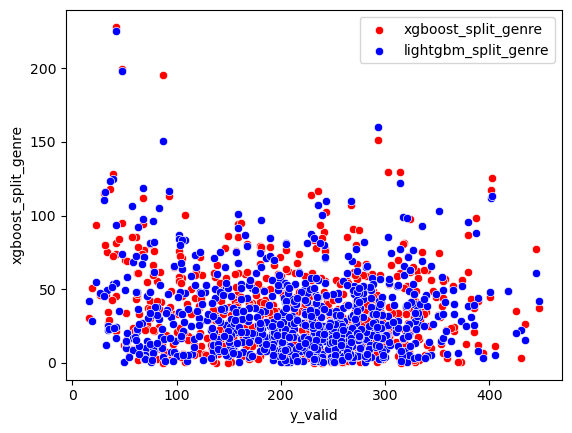

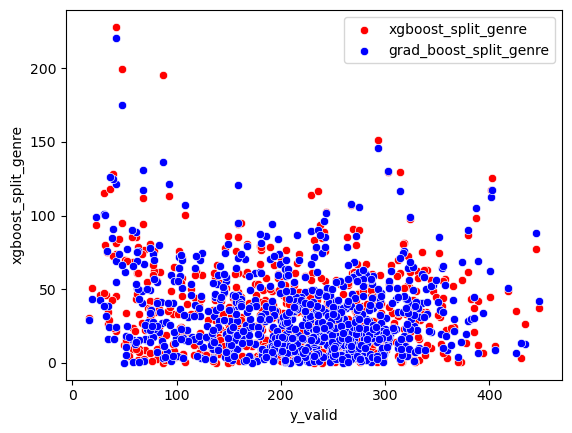

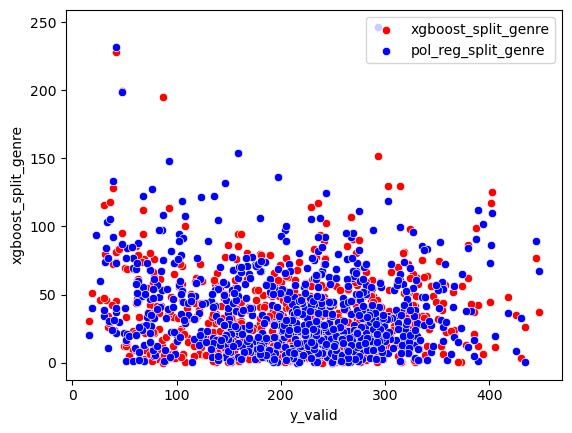

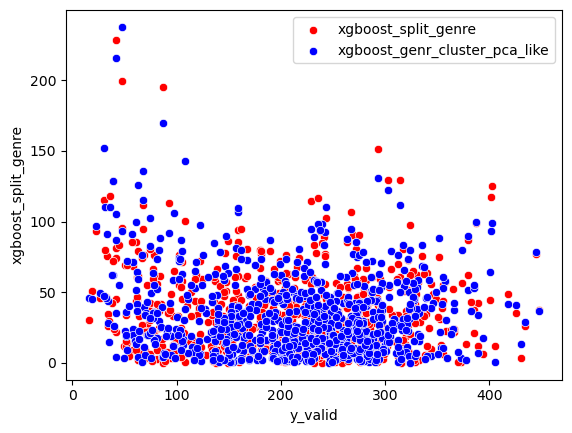

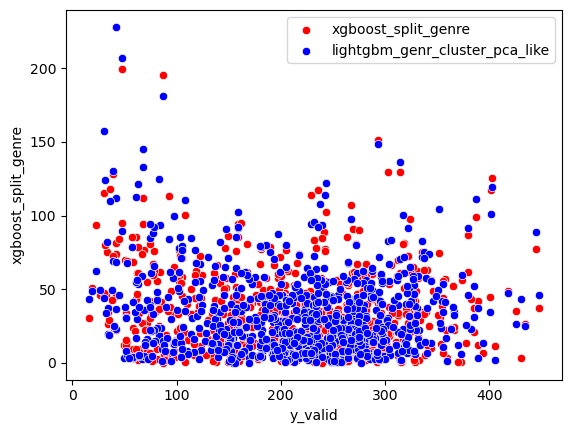

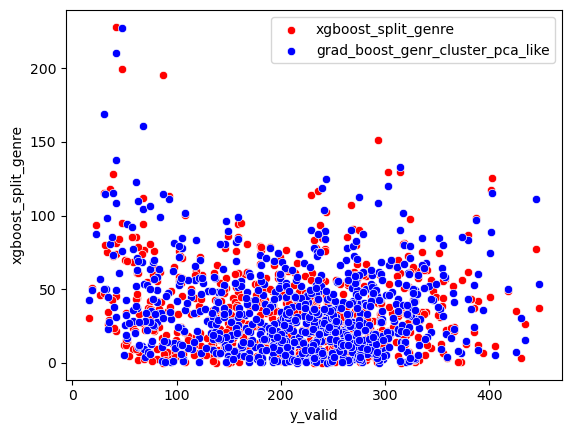

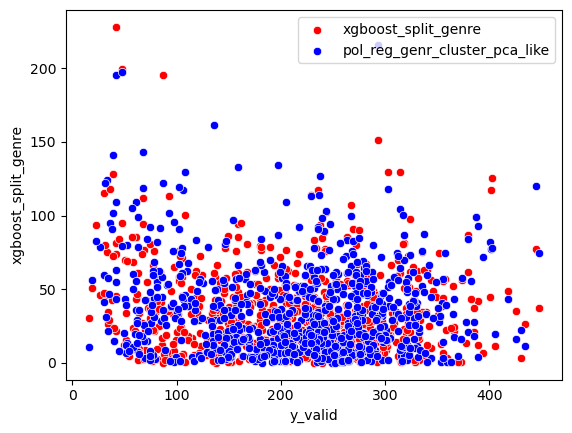

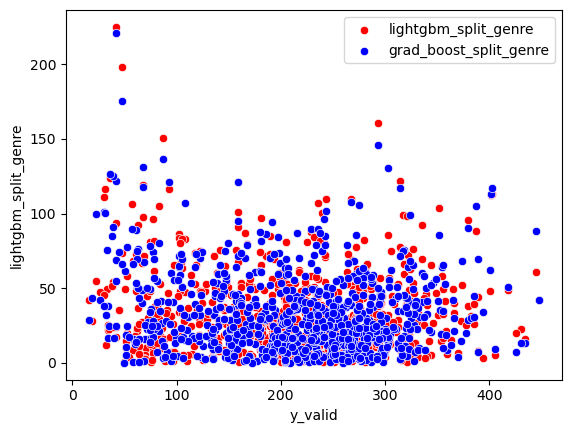

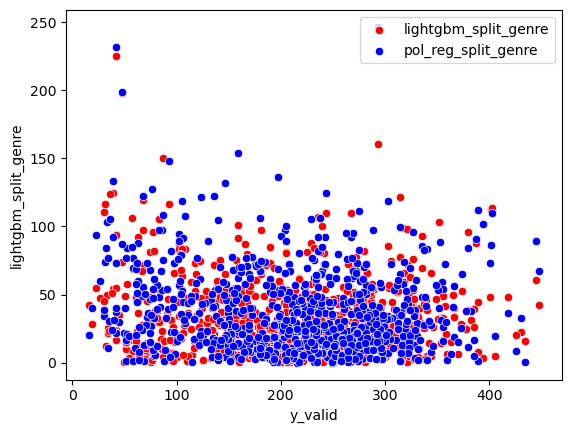

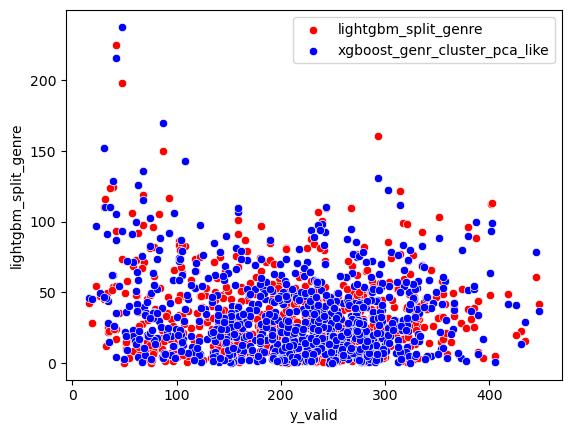

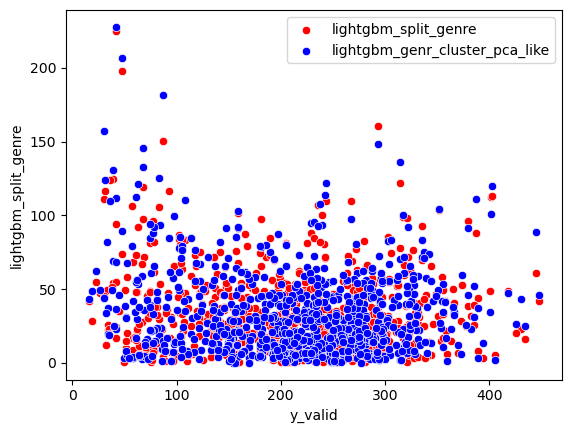

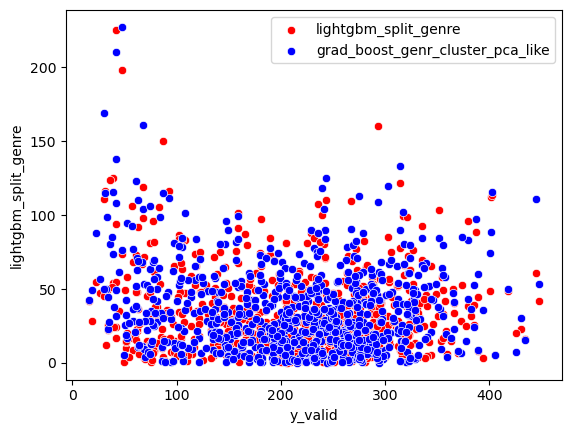

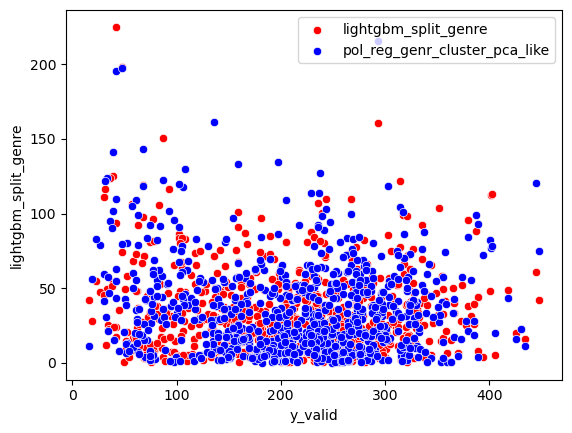

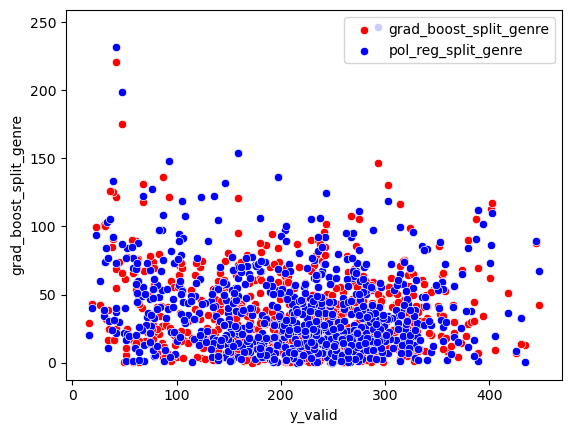

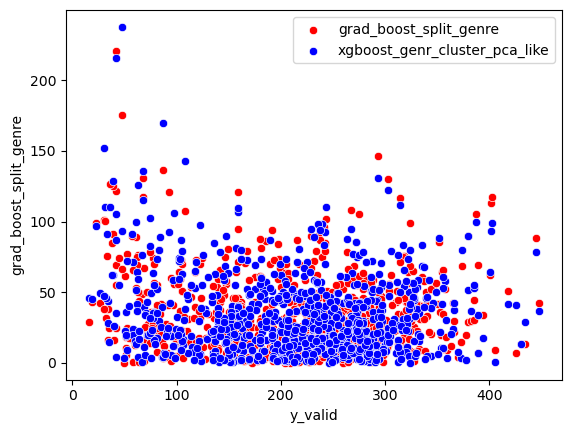

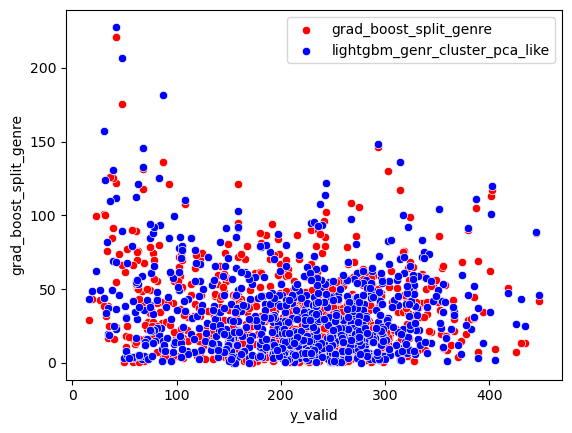

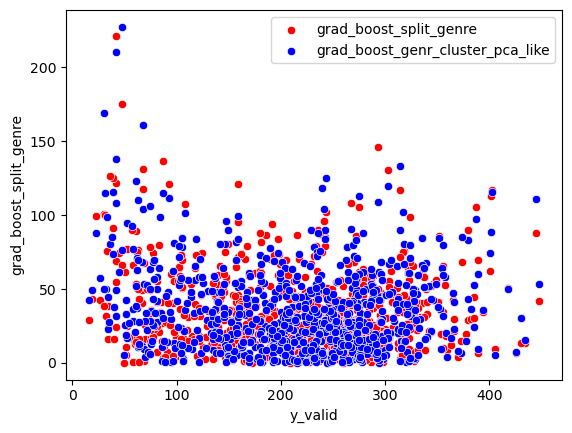

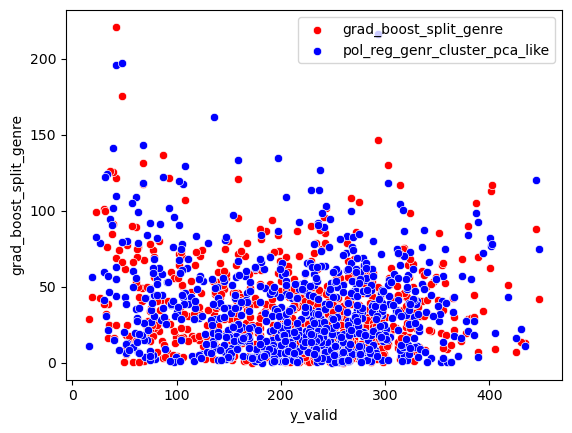

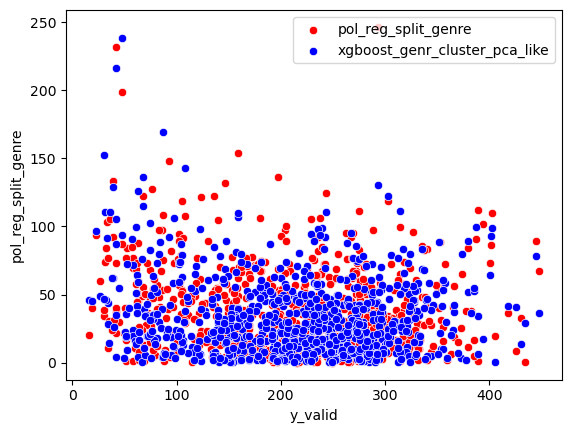

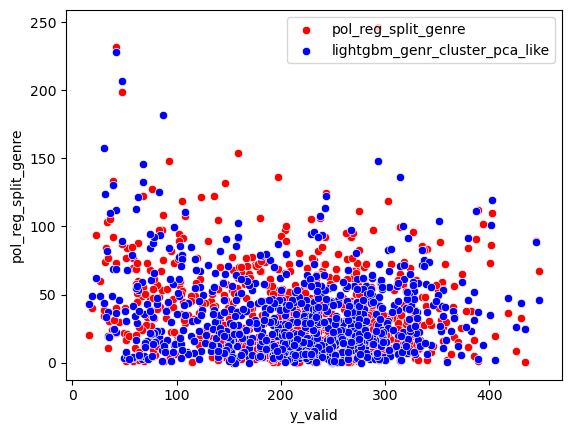

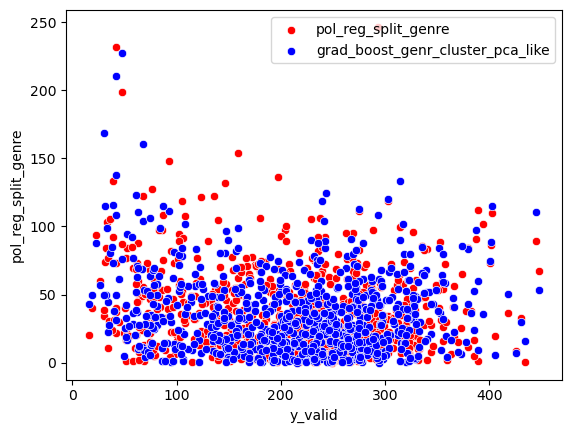

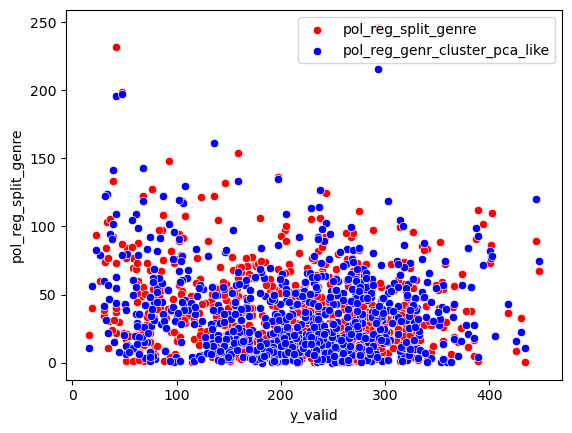

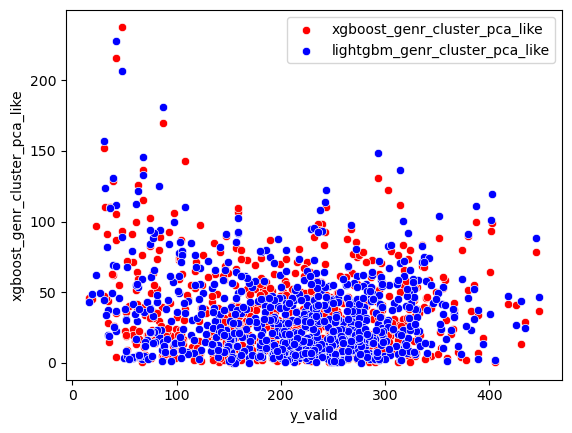

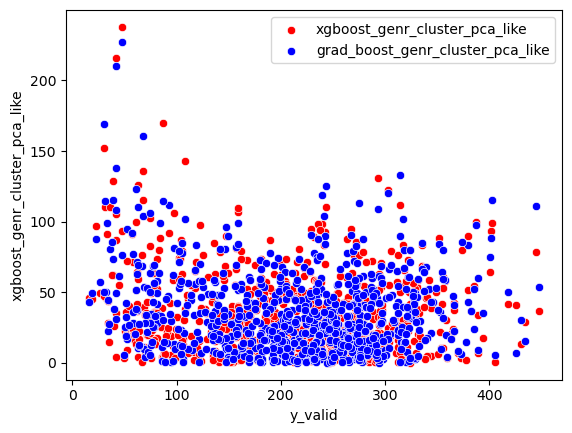

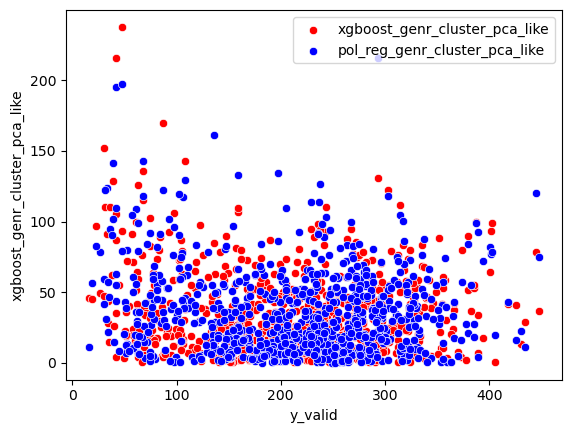

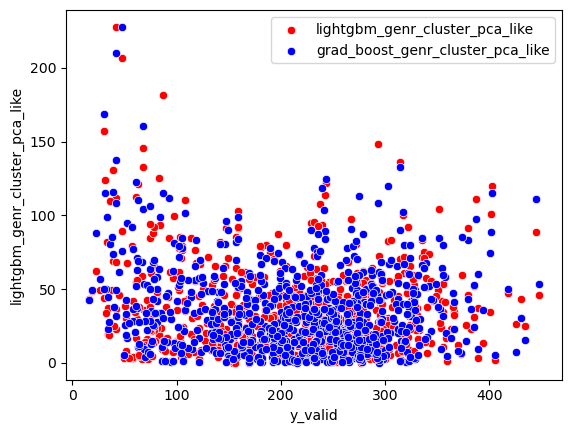

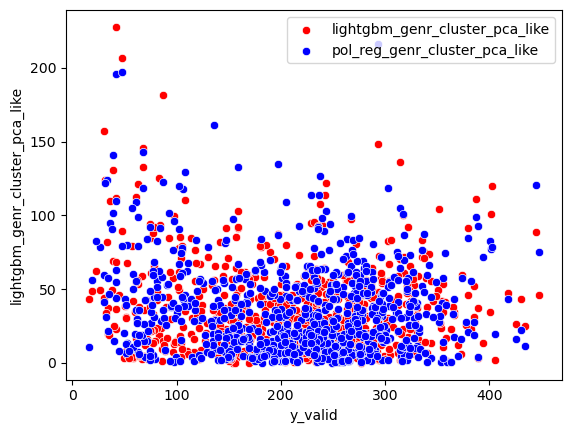

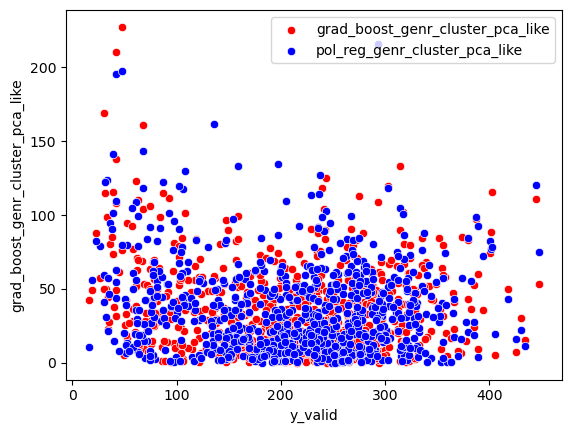

In [183]:
for i in range(1, models_absol_err_df.shape[1] - 1):
    for j in range(i+1, models_absol_err_df.shape[1] - 1):
        vizualize_abs_err(models_absol_err_df.columns[i], models_absol_err_df.columns[j])

## Calculating metrics

In [185]:
models_metric_one_split = pd.DataFrame(index = models_absol_err_df.columns[1: models_absol_err_df.shape[1] - 1])

In [186]:
models_metric_one_split

""
xgboost_split_genre
lightgbm_split_genre
grad_boost_split_genre
pol_reg_split_genre
xgboost_genr_cluster_pca_like
lightgbm_genr_cluster_pca_like
grad_boost_genr_cluster_pca_like
pol_reg_genr_cluster_pca_like


### MSE & std

In [188]:
models_absol_err_df.iloc[:, 1: models_absol_err_df.shape[1] - 1]**2

,xgboost_split_genre,lightgbm_split_genre,grad_boost_split_genre,pol_reg_split_genre,xgboost_genr_cluster_pca_like,lightgbm_genr_cluster_pca_like,grad_boost_genr_cluster_pca_like,pol_reg_genr_cluster_pca_like
0,735.008471,695.872691,404.487161,1343.954436,856.684106,184.417203,1199.352428,1281.961074
1,52077.006674,50653.270012,48804.718803,53685.555375,46691.357715,51901.261306,44231.445925,38227.370944
2,3742.375061,4744.730022,2167.942659,3843.091929,4029.544843,1101.930395,2583.084918,5819.908002
3,609.927692,878.836923,445.793441,2308.007763,886.502885,366.822506,1146.138054,3620.457503
4,204.475830,53.196126,274.080960,664.028173,75.964638,45.241102,156.014019,18.839265
...,...,...,...,...,...,...,...,...
789,1284.074582,1011.645478,501.547552,1668.611663,497.214009,1276.653350,361.909622,1509.364147
790,1.305028,19.862898,0.891283,72.888800,787.821747,65.524398,149.416156,2.928717
791,4383.698804,4874.081171,5297.672434,363.473535,3954.893398,4981.018577,4781.427875,2490.195431
792,4617.346169,1950.218805,7539.362850,1375.868952,5061.977443,2882.745254,3427.063552,1830.155819


In [189]:
square_model = models_absol_err_df.iloc[:, 1: models_absol_err_df.shape[1] - 1]**2

In [190]:
models_metric_one_split['mse'] = square_model.mean()

In [191]:
models_metric_one_split['se_std'] = square_model.std()

In [192]:
models_metric_one_split

,mse,se_std
xgboost_split_genre,1802.106818,3648.708829
lightgbm_split_genre,1739.174110,3459.561474
grad_boost_split_genre,1822.479404,3356.176186
pol_reg_split_genre,2230.378909,4336.346904
xgboost_genr_cluster_pca_like,1935.833537,3871.247634
lightgbm_genr_cluster_pca_like,1938.096891,3891.617812
grad_boost_genr_cluster_pca_like,2008.026416,3771.369182
pol_reg_genr_cluster_pca_like,2125.946450,3935.948946


### MAPE & std

In [194]:
ape_models = models_absol_err_df.iloc[:, 1:models_absol_err_df.shape[1] - 1].div(models_absol_err_df['y_valid'], axis=0)

In [195]:
models_metric_one_split['mape'] = ape_models.mean()

In [196]:
models_metric_one_split['ape_std'] = ape_models.std()

In [197]:
models_metric_one_split

,mse,se_std,mape,ape_std
xgboost_split_genre,1802.106818,3648.708829,0.242404,0.462636
lightgbm_split_genre,1739.174110,3459.561474,0.232290,0.436985
grad_boost_split_genre,1822.479404,3356.176186,0.245915,0.462928
pol_reg_split_genre,2230.378909,4336.346904,0.265478,0.460021
xgboost_genr_cluster_pca_like,1935.833537,3871.247634,0.254488,0.504056
lightgbm_genr_cluster_pca_like,1938.096891,3891.617812,0.250086,0.491274
grad_boost_genr_cluster_pca_like,2008.026416,3771.369182,0.263630,0.513254
pol_reg_genr_cluster_pca_like,2125.946450,3935.948946,0.259583,0.478680


In [198]:
models_metric_one_split = models_metric_one_split.reset_index(names = 'model_in_df')

In [199]:
models_metric_one_split

,model_in_df,mse,se_std,mape,ape_std
0,xgboost_split_genre,1802.106818,3648.708829,0.242404,0.462636
1,lightgbm_split_genre,1739.174110,3459.561474,0.232290,0.436985
2,grad_boost_split_genre,1822.479404,3356.176186,0.245915,0.462928
3,pol_reg_split_genre,2230.378909,4336.346904,0.265478,0.460021
4,xgboost_genr_cluster_pca_like,1935.833537,3871.247634,0.254488,0.504056
5,lightgbm_genr_cluster_pca_like,1938.096891,3891.617812,0.250086,0.491274
6,grad_boost_genr_cluster_pca_like,2008.026416,3771.369182,0.263630,0.513254
7,pol_reg_genr_cluster_pca_like,2125.946450,3935.948946,0.259583,0.478680


## F-test for testing the hypothesis of equality of variances

In [201]:
sample_size_stability_one_split = models_absol_err_df.shape[0]

In [202]:
dfn_one_split = sample_size_stability_one_split
dfd_one_split = sample_size_stability_one_split

In [203]:
fill_equality_var(list(models_metric_one_split['se_std']), dfn, dfd)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [204]:
fill_equality_var(list(models_metric_one_split['ape_std']), dfn, dfd)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [205]:
#### Conclusion: The difference in variances is significant => Welch's t-test

## Welch's t-test

In [207]:
welchs_test('mse', 'se_std', models_metric_one_split, sample_size_stability_one_split)

,xgboost_split_genre,lightgbm_split_genre,grad_boost_split_genre,pol_reg_split_genre,xgboost_genr_cluster_pca_like,lightgbm_genr_cluster_pca_like,grad_boost_genr_cluster_pca_like,pol_reg_genr_cluster_pca_like
xgboost_split_genre,NaN,0,0,1,0,0,0,0
lightgbm_split_genre,NaN,NaN,0,1,0,0,0,1
grad_boost_split_genre,NaN,NaN,NaN,1,0,0,0,0
pol_reg_split_genre,NaN,NaN,NaN,NaN,0,0,0,0
xgboost_genr_cluster_pca_like,NaN,NaN,NaN,NaN,NaN,0,0,0
lightgbm_genr_cluster_pca_like,NaN,NaN,NaN,NaN,NaN,NaN,0,0
grad_boost_genr_cluster_pca_like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
pol_reg_genr_cluster_pca_like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
models_metric_one_split.loc[models_metric_one_split['mse'] == models_metric_one_split['mse'].min(), 'model_in_df']

1    lightgbm_split_genre
Name: model_in_df, dtype: object

In [ ]:
### Conclusion: according to the test lightgbm_split_genre is equialent to grad_boost_split_genre, xgboost_genr_cluster_pca_like, 
### lightgbm_genr_cluster_pca_like, grad_boost_genr_cluster_pca_like => this test doesn't help to choose the best model

In [208]:
welchs_test('mape', 'ape_std', models_metric_one_split, sample_size_stability_one_split)

,xgboost_split_genre,lightgbm_split_genre,grad_boost_split_genre,pol_reg_split_genre,xgboost_genr_cluster_pca_like,lightgbm_genr_cluster_pca_like,grad_boost_genr_cluster_pca_like,pol_reg_genr_cluster_pca_like
xgboost_split_genre,NaN,0,0,0,0,0,0,0
lightgbm_split_genre,NaN,NaN,0,0,0,0,0,0
grad_boost_split_genre,NaN,NaN,NaN,0,0,0,0,0
pol_reg_split_genre,NaN,NaN,NaN,NaN,0,0,0,0
xgboost_genr_cluster_pca_like,NaN,NaN,NaN,NaN,NaN,0,0,0
lightgbm_genr_cluster_pca_like,NaN,NaN,NaN,NaN,NaN,NaN,0,0
grad_boost_genr_cluster_pca_like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
pol_reg_genr_cluster_pca_like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
### Conclusion: mape doesn't help in this test to choose the best model